In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [6]:
def camera_plot(camera_type):
    f, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 10))


    rows =  ['X Centroid/RMS', 'Y Centroid/RMS', 'U Centroid/RMS', 'V Centroid/RMS']
        
#         ax[i].yaxis.set_label_coords(-0.15,0.9)
        
    f.suptitle('Centroids and Variance Across 100 Timesteps', fontsize=24)
    for i, coord in enumerate(['x', 'y', 'u', 'v']):
        # Load an example dataset with long-form data
        mean_bg= np.array(np.squeeze(joined[[f'{camera_type}GaussBG_{coord}Centroid']].dropna()))
        std_bg = np.array(np.squeeze(joined[[f'{camera_type}GaussBG_{coord}rms']].dropna()))
        t = np.array(range(0, 11389))

        mean= np.array(np.squeeze(joined[[f'{camera_type}Gauss_{coord}Centroid']].dropna()))
        std = np.array(np.squeeze(joined[[f'{camera_type}Gauss_{coord}rms']].dropna()))
        t = np.array(range(0, 11389))
        

        ax[i].set_ylabel(rows[i], rotation=0,  fontdict = { 'fontsize': 18})
        ax[i].yaxis.set_label_coords(-0.10,0.9)
        ax[i].plot(t[:100], mean[:100], label='X Centroid')
        ax[i].fill_between(t[:100], mean[:100] - std[:100], mean[:100] + std[:100], alpha=0.5)

       
    return ax 

def com(camera_type):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
        
#         ax[i].yaxis.set_label_coords(-0.15,0.9)
        
    f.suptitle('SCAM COM Data', fontsize=24)
    com = np.array(np.squeeze(joined['SCam3_COM'].dropna()))
    t = np.array(range(0, 11389))

    ax.yaxis.set_label_coords(-0.10,0.9)
    ax.plot(t[:100], com[:100], label='COM Data SCAM')
#     ax.fill_between(t[:100], mean[:100] - std[:100], mean[:100] + std[:100], alpha=0.5)


In [7]:
df = pd.read_pickle('pickled_df_ALL.pk')

## First Glance Visualization

### Waveform Data

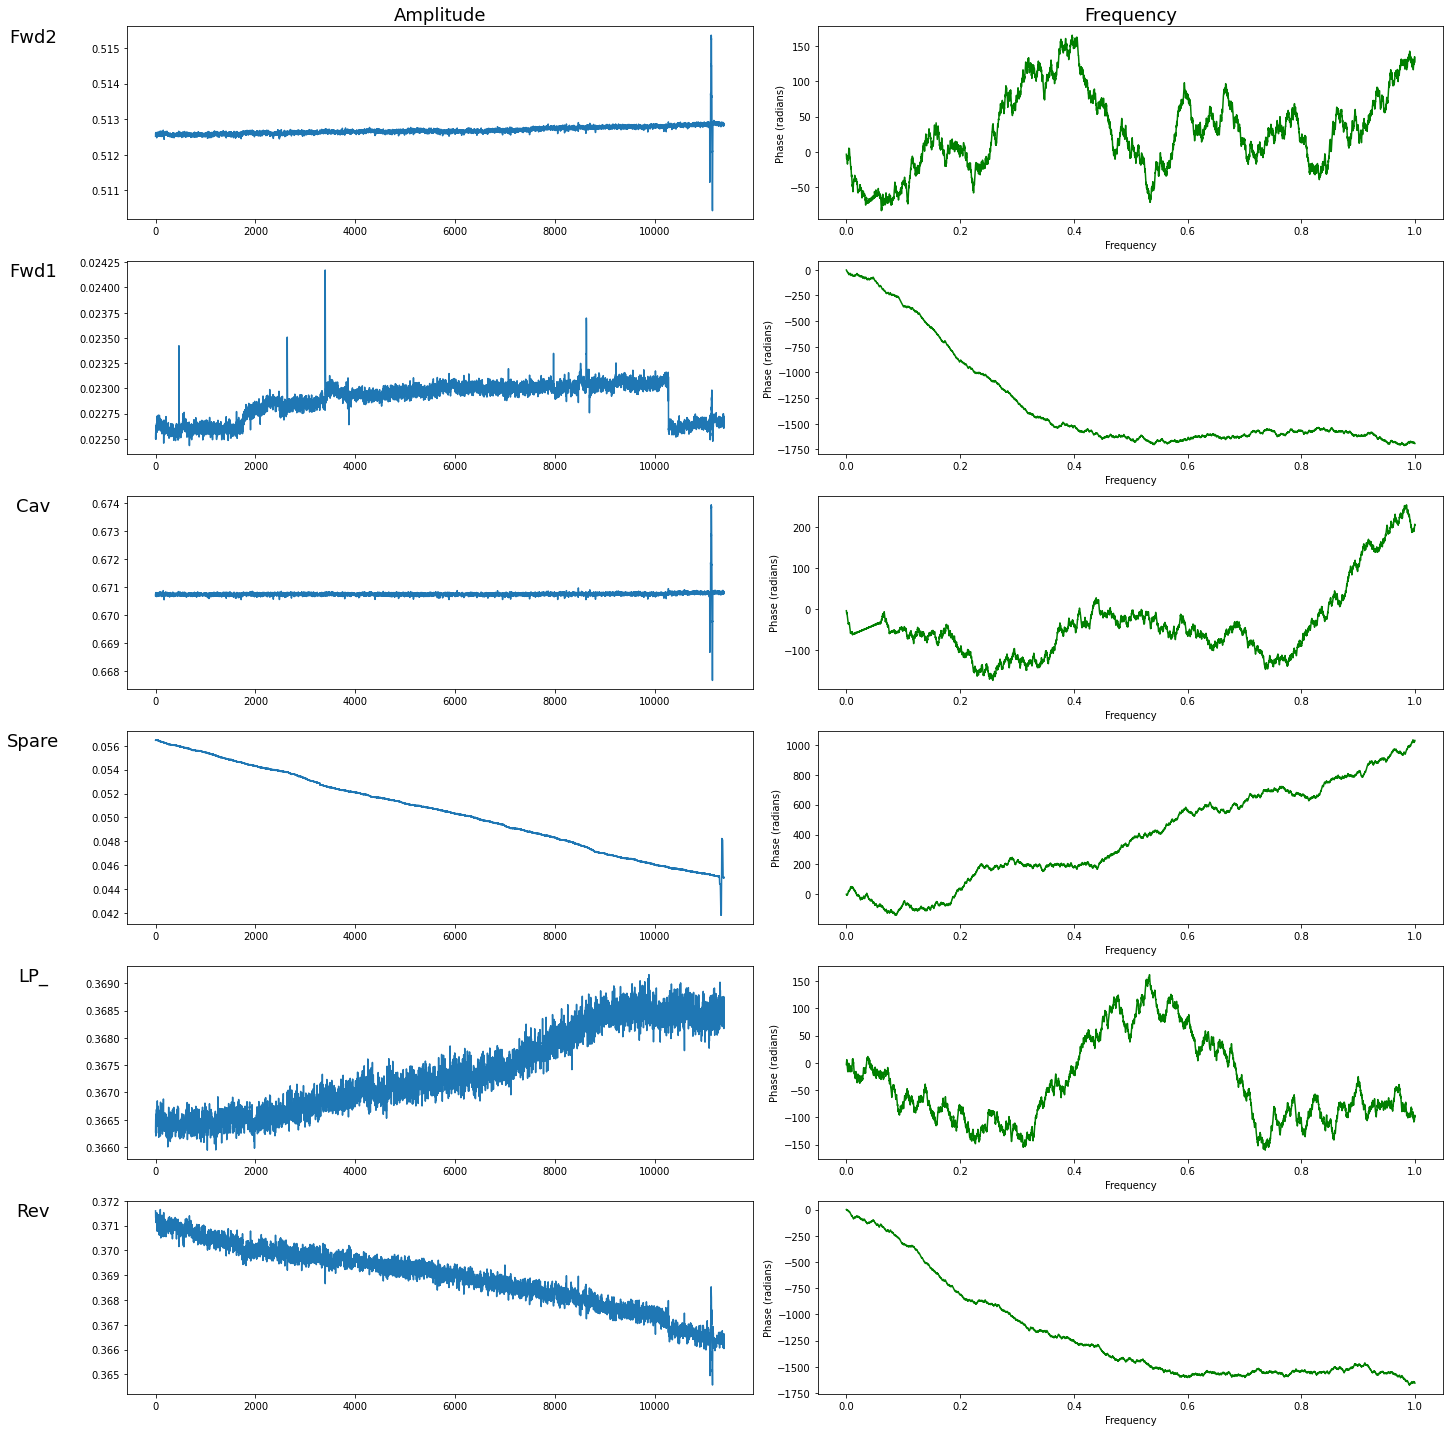

In [9]:
#TODO: understand how this is spectogram ready data given the implicit sampling interval 

amp_keys = ['Fwd2Amp',  'Fwd1Amp', 'CavAmp', 'SpareAmp', 'LP_Amp','RevAmp']
phs_keys =  ['Fwd2Phs', 'Fwd1Phs', 'Cavphs', 'SparePhs',  'LP_Phase', 'Rev_Phs']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,20), tight_layout=True)

for ax, col in zip(axes[0], ['Amplitude', 'Frequency']):
    ax.set_title(col,  fontdict = { 'fontsize': 18})

for ax, row in zip(axes[:,0], list(map(lambda x: x.replace('Amp', ''), amp_keys))):
    ax.set_ylabel(row, rotation=0,  fontdict = { 'fontsize': 18})
    ax.yaxis.set_label_coords(-0.15,0.9)

for e in range(0, len(amp_keys)):
    time = np.array(range(0, 11389))
    
    amp_key = amp_keys[e]
    amps = np.array(np.squeeze(df[amp_key].dropna()))
    
    
    #transform to complex numbers
    phs_key = phs_keys[e]
    phs = np.array(np.squeeze(df[phs_key].dropna()))
    phs = np.deg2rad(phs)

    axes[e, 0].plot(time, amps)
    
    axes[e, 1].phase_spectrum(phs, color ='green')

### Camera Data

In [11]:
cols = ['LCamGaussBG_xCentroid', 'LCamGaussBG_xrms',  'LCamGaussBG_yCentroid', 'LCamGaussBG_uCentroid', 'LCamGaussBG_vCentroid']
cols = ['LCamGauss_xCentroid', 'LCamGauss_xrms', 'LCamGauss_yCentroid', 'LCamGauss_uCentroid', 'LCamGauss_vCentroid']
lcam_bg_loc_data = ['LCamGaussBG_xCentroid', 'LCamGaussBG_xrms',  'LCamGaussBG_yCentroid', 'LCamGaussBG_uCentroid', 'LCamGaussBG_vCentroid']
 
lcam_loc_data = ['LCamGauss_xCentroid', 'LCamGauss_xrms', 'LCamGauss_yCentroid', 'LCamGauss_uCentroid', 'LCamGauss_vCentroid']
    
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 15))
# joined[lcam_bg_loc_data + lcam_loc_data].plot(subplots=True, ax= axes)




## Seasonal Decomposition: Target Variable

Note: in extreme forecasting uber paper de-trending versus de-seasoning produced better results 

Time
1970-01-01 00:00:00    144.965271
1970-01-01 00:00:01    152.220001
1970-01-01 00:00:02    154.655060
1970-01-01 00:00:03    136.711258
1970-01-01 00:00:04    158.997177
Name: SCam3_COM, dtype: float64


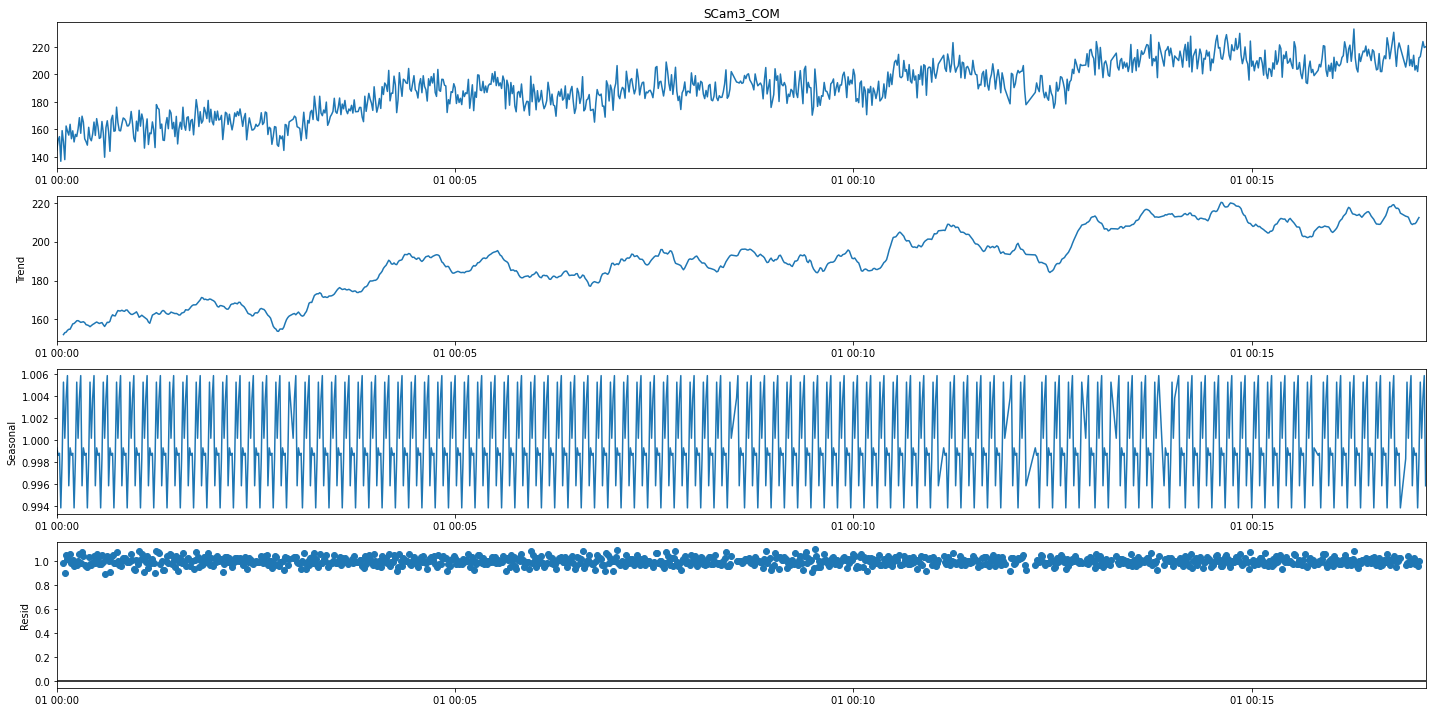

In [12]:
target = df['SCam3_COM'].asfreq(freq='1S').dropna()[:1000]

with plt.rc_context():
    plt.rc("figure", figsize=(20,10))
    result = seasonal_decompose(target, model='multiplicative', period = 10)
    result.plot()
    



## Data Normalization

In [ ]:
fig, ax = plt.subplots(figsize = (30, 10))

transformed.boxplot(ax = ax, column = ['Fwd1Amp', 'Fwd1Phs','SCam3_Gauss_xCentroid','SCam3_Gauss_yCentroid', 'SCam3_Gauss_uCentroid',
        'SCam3_Gauss_vCentroid',
        'SCam3_Gauss_xrms',
        'SCam3_Gauss_yrms',
        'SCam3_Gauss_urms',
        'SCam3_Gauss_vrms', 'SCam3_Gauss_Gaussian_Sum'], figsize=(20, 10))
ax.set_xticks(range(1, 12), ['Amp', 'Phs', 'x', 'y', 'u', 'v', 'xrms', 'yrms', 'urms', 'vrms', 'GaussSum'], fontsize = 18)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylim(-10, 10)
ax.set_title('Normalized and Diffed SCam/Fwd1 Data', fontsize = 24)
plt.show()